In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Load the provided CSV file into a Data Frame object named chatterbox.

In [2]:
chatterbox = pd.read_csv('../CSV_Files/employees.csv')


2. Get an overview of the data:

In [3]:
# Display the first few rows of the DataFrame
print(chatterbox.head())

# Check the dimensions of the DataFrame
print(chatterbox.shape)

# Get summary statistics of the numerical columns
print(chatterbox.describe())

# Check the data types of the columns
print(chatterbox.dtypes)


   Employee_No  Employee_Code                 Name Title  Gender  Religion_ID  \
0          347              6    Myrl Bechtelar MD    Mr    Male            1   
1          348             33         Francis Mraz    Mr    Male            1   
2          349             53    Mr Emmet Blick Jr    Mr    Male            1   
3          351             77  Mr Nelson Braun PhD    Ms  Female            4   
4          352             88     Maximillian Hand    Mr    Male            1   

  Marital_Status  Designation_ID Date_Joined Date_Resigned    Status  \
0        Married              24   12/8/1993            \N    Active   
1        Married              24   3/14/1995            \N    Active   
2        Married              23   1/27/1988     6/28/2021  Inactive   
3        Married              40   10/1/1999     1/31/2022  Inactive   
4        Married               7   1/26/2001            \N    Active   

  Inactive_Date Reporting_emp_1 Reporting_emp_2 Employment_Category  \
0        

3. Check for missing values:

In [4]:
chatterbox.head(50)

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
5,353,155,Zena Nicolas,Mr,Male,1,Married,22,9/29/2003,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962
6,354,181,Coralie Bernhard,Mr,Male,1,Married,22,11/10/2003,0000-00-00,Active,0000-00-00,945,\N,Staff,Permanant,Buddhist,Technical Officer,1969
7,355,192,Josh Roob,Mr,Male,1,Married,126,2/16/2004,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Project Coordinator,1981
8,356,283,Ernest Upton,Ms,Female,1,Single,23,6/1/2005,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,7/1/2006,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967


In [5]:
# Count the number of missing values in each column
missing_values = chatterbox.isnull().sum()
print(missing_values)

Employee_No             0
Employee_Code           0
Name                    0
Title                   0
Gender                  0
Religion_ID             0
Marital_Status         67
Designation_ID          0
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64




*   There are missing values present in the type of '\N', '0000' in Year_of_birth column and '0000-00-00' in Date_Resigned and Inactive_Date columns.




In [6]:
# Convert each of these values to NaN.
chatterbox = chatterbox.where(chatterbox != '\\N')
chatterbox.Year_of_Birth = chatterbox.Year_of_Birth.where(chatterbox.Year_of_Birth != "'0000'")
chatterbox.Date_Resigned = chatterbox.Date_Resigned.where(chatterbox.Date_Resigned != '0000-00-00')
chatterbox.Inactive_Date = chatterbox.Inactive_Date.where(chatterbox.Inactive_Date != '0000-00-00')

print(chatterbox.isnull().sum())

Employee_No              0
Employee_Code            0
Name                     0
Title                    0
Gender                   0
Religion_ID              0
Marital_Status          67
Designation_ID           0
Date_Joined              0
Date_Resigned          456
Status                   0
Inactive_Date          233
Reporting_emp_1        936
Reporting_emp_2        997
Employment_Category      0
Employment_Type          0
Religion                 0
Designation              0
Year_of_Birth          103
dtype: int64




*   Reporting_emp_1, Reporting_emp_2 column has a significant number of missing values.So it is not important for our analysis. we can choose to remove it this entirely.



In [7]:
# # Remove two columns from the dataset
# columns_to_remove = ['Reporting_emp_1','Reporting_emp_2']
# chatterbox = chatterbox.drop(columns=columns_to_remove)

4. Handling Missing Values of Year of Birth Column



*   Lets find meadian,mode and mean using given datas


In [8]:
# convert the 'Year_of_Birth' column to numeric values and store them as nullable integers.

chatterbox['Year_of_Birth'] = pd.to_numeric(chatterbox['Year_of_Birth'], errors='coerce')
chatterbox['Year_of_Birth'] = chatterbox['Year_of_Birth'].astype('Int64')

In [9]:
# temp DataFrame will be a modified version of 'chatterbox' with the rows containing missing values in the 'Year_of_Birth' column removed.
temp =  chatterbox.copy()
temp = temp.dropna(subset=['Year_of_Birth'])

temp.shape

(894, 19)

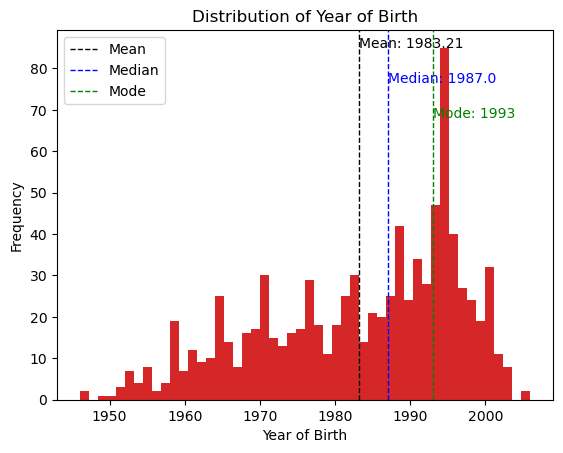

In [10]:
plt.hist(temp['Year_of_Birth'], bins=50)
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Year of Birth')

# Add vertical lines for mean, median, and mode
mean_val = temp['Year_of_Birth'].mean()
median_val = temp['Year_of_Birth'].median()
mode_val = temp['Year_of_Birth'].mode()[0]

plt.axvline(mean_val, color='k', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_val, color='b', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode_val, color='g', linestyle='dashed', linewidth=1, label='Mode')

# Display mean, median, and mode as text
plt.text(mean_val, np.max(plt.hist(temp['Year_of_Birth'], bins=50)[0]), f"Mean: {mean_val:.2f}", color='k')
plt.text(median_val, np.max(plt.hist(temp['Year_of_Birth'], bins=50)[0])*0.9, f"Median: {median_val}", color='b')
plt.text(mode_val, np.max(plt.hist(temp['Year_of_Birth'], bins=50)[0])*0.8, f"Mode: {mode_val}", color='g')

plt.legend()
plt.show()




*   this has negative skewness shape.so use Median to fill null vales.





In [11]:
chatterbox['Year_of_Birth'] = chatterbox['Year_of_Birth'].fillna(chatterbox['Year_of_Birth'].median())

5. Handling Missing Values of  Marital Status Column

In [12]:
# find out what data is present in a column
unique_values = chatterbox['Marital_Status'].unique()
print(unique_values)

['Married' 'Single' nan]


In [13]:
# temp1 DataFrame will be a modified version of 'chatterbox' with the rows containing missing values in the 'Marital_Status' column removed.
temp1 = chatterbox.copy()
temp1 = temp1.dropna(subset=['Marital_Status'])

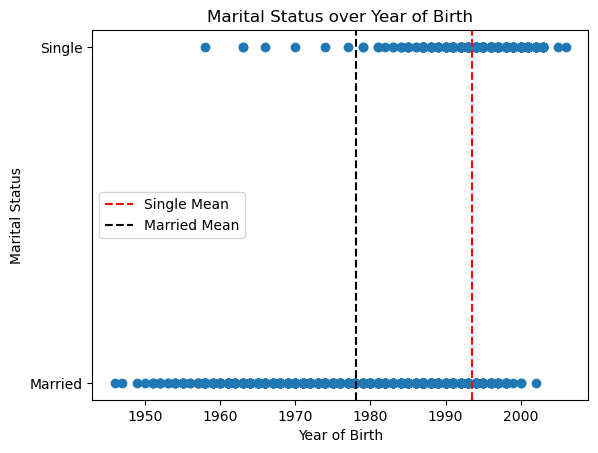

In [14]:
# 'Year_of_Birth' column against the 'Marital_Status'

plt.scatter(temp1['Year_of_Birth'], temp1['Marital_Status'])
plt.xlabel('Year of Birth')
plt.ylabel('Marital Status')
plt.title('Marital Status over Year of Birth')

# Add vertical lines for the mean 'Year_of_Birth' for each 'Marital_Status' category
plt.axvline(x=temp1[temp1['Marital_Status'] == 'Single']['Year_of_Birth'].mean(), color='r', linestyle='dashed', label='Single Mean')
plt.axvline(x=temp1[temp1['Marital_Status'] == 'Married']['Year_of_Birth'].mean(), color='k', linestyle='dashed', label='Married Mean')

plt.legend()  # Display the legend
plt.show()




*   calculates the mean of the 'Year_of_Birth' values for the 'Single' and 'Married' categories in the 'temp1' DataFrame. It then uses this mean value to fill the missing values in the 'Marital_Status' column of the 'chatterbox' DataFrame.


In [15]:
# Calculate the mean of 'Year_of_Birth' for 'Single' and 'Married' categories
meanYear = (temp1[temp1['Marital_Status'] == 'Single']['Year_of_Birth'].mean() +
            temp1[temp1['Marital_Status'] == 'Married']['Year_of_Birth'].mean()) / 2

# Fill missing values in 'Marital_Status' based on the condition using 'meanYear'
chatterbox['Marital_Status'] = chatterbox['Marital_Status'].fillna(chatterbox['Year_of_Birth'].apply(lambda x: 'Single' if x > meanYear else 'Married'))

In [16]:
chatterbox.head(50)

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,NaN,Active,NaN,NaN,NaN,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,NaN,Active,NaN,NaN,NaN,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,NaN,NaN,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,NaN,NaN,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,NaN,Active,NaN,NaN,NaN,Staff,Permanant,Buddhist,Store Keeper,1980
5,353,155,Zena Nicolas,Mr,Male,1,Married,22,9/29/2003,NaN,Inactive,8/31/2020,NaN,NaN,Staff,Permanant,Buddhist,Technical Officer,1962
6,354,181,Coralie Bernhard,Mr,Male,1,Married,22,11/10/2003,NaN,Active,NaN,945,NaN,Staff,Permanant,Buddhist,Technical Officer,1969
7,355,192,Josh Roob,Mr,Male,1,Married,126,2/16/2004,NaN,Active,NaN,NaN,NaN,Staff,Permanant,Buddhist,Project Coordinator,1981
8,356,283,Ernest Upton,Ms,Female,1,Single,23,6/1/2005,NaN,Active,NaN,NaN,NaN,Staff,Permanant,Buddhist,Account Clerk,1974
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,7/1/2006,1/31/2022,Inactive,1/31/2022,NaN,NaN,Staff,Permanant,Buddhist,Electrician,1967


 6. identify whether there are data quality issues

find duplicates in Employee_No	,Employee_Code	,Name columns of a DataFrame.

In [17]:
column_has_duplicates = chatterbox['Name'].duplicated().any()

if column_has_duplicates:
    print("The column has duplicates.")
else:
    print("The column does not have duplicates.")



The column does not have duplicates.


In [18]:
column_has_duplicates = chatterbox['Employee_No'].duplicated().any()

if column_has_duplicates:
    print("The column has duplicates.")
else:
    print("The column does not have duplicates.")


The column does not have duplicates.


In [19]:
column_has_duplicates = chatterbox['Employee_Code'].duplicated().any()

if column_has_duplicates:
    print("The column has duplicates.")
else:
    print("The column does not have duplicates.")

The column does not have duplicates.


In [20]:
chatterbox.to_csv('employee_preprocess_200607V.csv', index=False)